# Test harness for applied vibration class

### Import the libraries

In [1]:
import numpy as np
import math
import pandas as pd

### Import the signal processing library

In [2]:
from appvib import ClSigFeatures

#### Verify help and class structure

In [3]:
help(ClSigFeatures)

Help on class ClSigFeatures in module appvib:

class ClSigFeatures(ClSigReal, ClSigComp)
 |  ClSigFeatures(np_d_ch1, timebase_scale)
 |  
 |  Class to manage signal features on scope data and other signals
 |  
 |  Example usage:
 |      cl_test = cl_sig_features(np.array([1.,2., 3.]),1.1)
 |  
 |  Should produce:
 |  
 |      print('np_d_ch1: '+ np.array2string(cl_test.np_d_ch1))
 |      print('timebase_scale: ' + '%0.3f' % cl_test.timebase_scale)
 |      print('i_ns: ' + '%3.f' % cl_test.i_ns)
 |      print('d_t_del: ' + '%0.3f' % cl_test.d_t_del)
 |      print('d_time' + np.array2string(cl_test.d_time))
 |  
 |      np_d_ch1: [1. 2. 3.]
 |      timebase_scale: 1.000
 |      i_ns:   3
 |      d_t_del: 4.000
 |      d_time[0. 4. 8.]
 |  
 |  Method resolution order:
 |      ClSigFeatures
 |      ClSigReal
 |      ClSigComp
 |      ClSig
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, np_d_ch1, timebase_scale)
 |      Initialize self.  See help(type(self)

### Define plot mode. 
Interactive mode is helpful for visuallizing the program execution

In [4]:
#%matplotlib widget

### Test for minimal construction

In [5]:
ClSigTestMin = ClSigFeatures(np.array([1.,2., 3.]),1.1)

##### Check smoke test

In [6]:
b_test_smoke = ClSigTestMin.b_smoke()
assert b_test_smoke, 'Failed to pass smoke test'

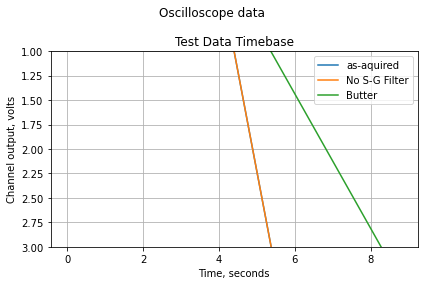

In [7]:
lst_testmin = ClSigTestMin.plt_sigs()

### Test - Even number of samples

In this test a simple sin wave is created and passed into the signal feature object for processing

In [8]:
d_fs = 2048
i_ns = (d_fs*2)
d_freq_sig = 20./(float(i_ns)/d_fs)
print('Signal frequency, hertz: ' + '%0.10f' % d_freq_sig)
d_timebase_scale = float(i_ns)/(d_fs*12.)
d_time_ext = np.linspace(0,(i_ns-1),i_ns)/float(i_ns)
np_d_test = np.sin(2 * math.pi * d_freq_sig * d_time_ext )
ClSigEven = ClSigFeatures(np_d_test, d_timebase_scale)

Signal frequency, hertz: 10.0000000000


#### Test plot

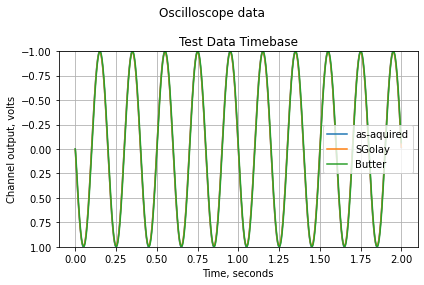

In [9]:
lst_sig_even = ClSigEven.plt_sigs()

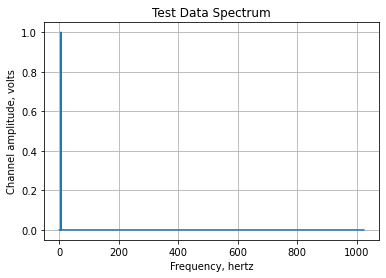

In [10]:
lst_spec_even = ClSigEven.plt_spec()

Extract the maximum value (assumed to be our component at 10 hertz) and check that the amplitude is very close to 1.

In [11]:
d_test_point = np.max(np.abs(lst_spec_even[2]))
print('Maximum spectral value: ' + '%0.10f' % d_test_point)
assert abs(d_test_point - 1.) < 1e-12, 'Failed to find even component amplitude'

Maximum spectral value: 1.0000000000


### Test - Odd number of samples

In this test a simple sin wave with an odd number of samples is created and passed into the signal feature object for processing. This is primarily to test the rfft scaling.

In [12]:
d_fs = 2047
i_ns = (d_fs*3)
d_freq_sig = 30./(float(i_ns)/d_fs)
print('Signal frequency, hertz: ' + '%0.6f' % d_freq_sig)
d_timebase_scale = float(i_ns)/(d_fs*12.)
d_time_ext = np.linspace(0,(i_ns-1),i_ns)/float(i_ns)
np_d_test = np.sin(2 * math.pi * d_freq_sig * d_time_ext )
ClSigOdd = ClSigFeatures(np_d_test, d_timebase_scale)

Signal frequency, hertz: 10.000000


#### Test plot

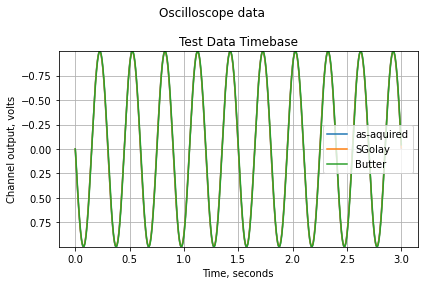

In [13]:
lst_plot_odd = ClSigOdd.plt_sigs()

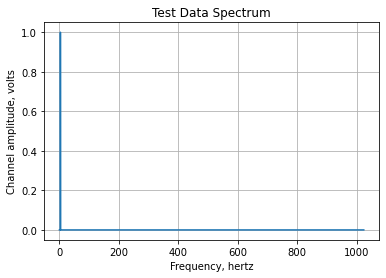

In [14]:
lst_spec_odd = ClSigOdd.plt_spec()

In [15]:
d_test_point = np.max(np.abs(lst_spec_odd[2]))
print('Maximum spectral value: ' + '%0.6f' % d_test_point)
assert abs(d_test_point - 1.) < 1e-3, 'Failed to find odd component amplitude'

Maximum spectral value: 1.000163


### Test for engineering units

In [16]:
ClSigTestMin.str_eu = "g's"

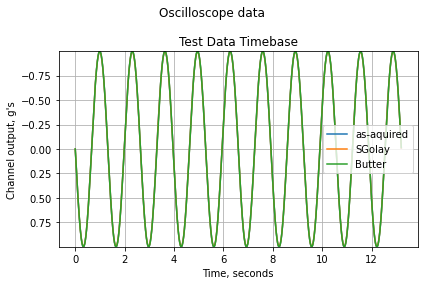

In [17]:
lst_sigs_eu = ClSigTestMin.plt_sigs()

In [18]:
lst_sigs_eu.set_size_inches(4*1.6, 4)
lst_sigs_eu.savefig('Test_Timebase_EU.pdf')

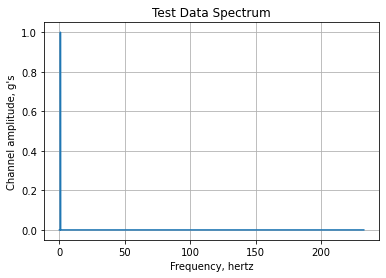

In [19]:
lst_spec_eu = ClSigTestMin.plt_spec()

### Test plot annotations

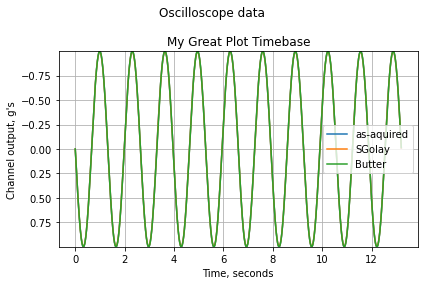

In [20]:
ClSigTestMin.str_plot_desc = 'My Great Plot'
lst_sigs_title = ClSigTestMin.plt_sigs()

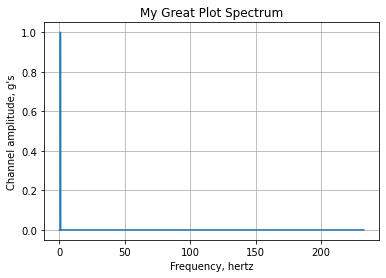

In [21]:
lst_spec_title = ClSigTestMin.plt_spec()

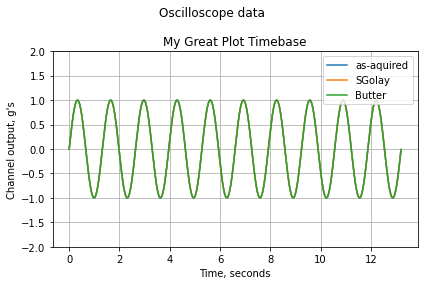

In [22]:
ClSigTestMin.ylim_tb = [-2., 2.]
lst_sigs_ylim_tb = ClSigTestMin.plt_sigs()

#### Labelling for the minimum instatiation case

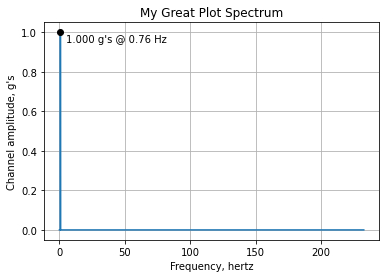

In [23]:
ClSigTestMin.b_spec_peak = True
lst_spec_peak_tb = ClSigTestMin.plt_spec()

#### Labelling for the even number of sample cases

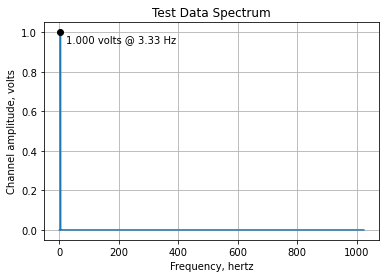

In [24]:
ClSigEven.b_spec_peak = True
lst_spec_peak_tb = ClSigEven.plt_spec()

#### Labelling for the odd number of sample cases

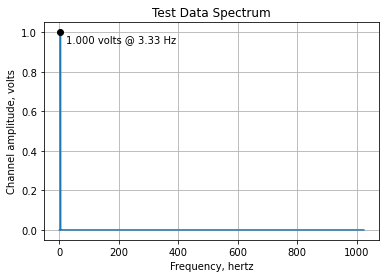

In [25]:
ClSigOdd.b_spec_peak = True
lst_spec_peak_tb = ClSigOdd.plt_spec()

### Test for minimal construction, multiple channels

In [26]:
ClSigMultCh = ClSigFeatures(np.array([1.,2., 3.]),1.1)
np_ch2 = np.array([3., 2.5, 2.])
ClSigMultCh.np_d_ch2 = np.array(np_ch2)

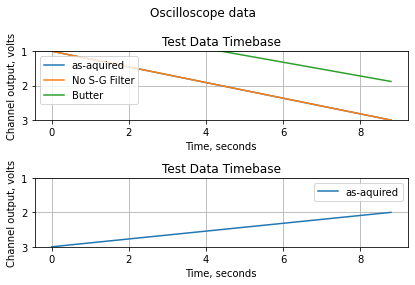

In [27]:
lst_testmin = ClSigMultCh.plt_sigs()

In [28]:
ClSigMultCh.b_save_data()

True

Read the file back in and compare to the input data

In [29]:
import csv

In [30]:
str_filename = ClSigMultCh.str_file
print(str_filename)
file_handle = open(str_filename)
csvreader = csv.reader(file_handle)
csv_header = []
csv_header = next(csvreader)
print(csv_header)

testclass_001.csv
['X', 'CH1', 'CH2', 'Start', 'Increment', '']


In [31]:
df_test = pd.read_csv(str_filename, header=None, skiprows=2, names=csv_header[0:5] )
df_test

,X,CH1,CH2,Start,Increment
0,0,1.0,3.0,NaN,NaN
1,1,2.0,2.5,NaN,NaN
2,2,3.0,2.0,NaN,NaN


In [32]:
assert abs(df_test.CH2[2] - np_ch2[2]) < 1e-15, 'Failed to save second data series' 
assert abs(df_test.CH2[1] - np_ch2[1]) < 1e-15, 'Failed to save second data series' 